In [47]:
#!pip install transformers[sentencepiece]
#!pip install tf-keras
#!pip install pandas matplotlib factor_analyzer

In [21]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, leaves_list

In [147]:
hypothesis_template = "The author of this lyrics could be described as {}"
zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0")

In [135]:
file_path = r"C:\Users\tian4\OneDrive\Bureau\Cours 2024-2025\corpus.csv"
# corpus.csv est téléchargé depuis https://huggingface.co/datasets/regicid/LRFAF
df = pd.read_csv(file_path)
df.sort_values(by="pageviews", ascending=False, inplace=True)

In [136]:
def extraire_lignes_paroles(chanson):
    # Séparer les paroles en lignes
    lignes = chanson.split('\n')
    
    # Liste pour stocker les lignes extraites sans doublon
    lignes_extraite = []
    lignes_vue = set()  # Utilisation d'un set pour éviter les doublons

    # Parcourir les lignes et vérifier la condition
    for i in range(len(lignes) - 1):  # On s'arrête à l'avant-dernière ligne
        # Vérifier si la ligne contient "je", "moi", "me" ou "j'"
        if re.search(r'\b(je|moi|me|j\')\b', lignes[i], re.IGNORECASE):
            # Vérifier si la ligne et la ligne suivante sont déjà ajoutées
            if lignes[i] not in lignes_vue:
                lignes_vue.add(lignes[i])  # Marquer ce couple comme vu
                lignes_extraite.append(lignes[i])
            if lignes[i+1] not in lignes_vue:
                lignes_vue.add(lignes[i+1])
                lignes_extraite.append(lignes[i+1])

    return '\n'.join(lignes_extraite)

# Exemple d'utilisation
paroles_chanson = """Je suis un homme
Je viens de loin
C'est ma vie
Moi je veux tout
Me voici maintenant
Je suis un homme
Je viens de loin"""

resultat = extraire_lignes_paroles(paroles_chanson)
print(resultat)

Je suis un homme
Je viens de loin
C'est ma vie
Moi je veux tout
Me voici maintenant


In [153]:
def zeo_shot(data,eventual_label):
    for i in data.index:  # i is the row index

        text = extraire_lignes_paroles(data.loc[i]['lyrics'])
        results = zeroshot_classifier(text, candidate_labels=eventual_label, hypothesis_template=hypothesis_template, multi_label=True)
        labels, scores = results["labels"], results["scores"]  # Corrected 'scores' to match the result
        n = len(labels)
        
    
        for col in data.columns[-10:]:  # col is the column name
        
            for j in range(n):
                if labels[j] == col:
                # Use .loc[] to set the value safely
                    data.loc[i, col] = scores[j]

In [35]:
label_group1 = ["self-made-man","réussite","mérite","travail","acharné", "inspirant","ambitieux","individualisme","indépendant","entreprenarial" ]
label_group2 = ["audace","rebel","bad boy","role-breaker","provocateur","antihéros","révolte","dissident","critique","insolent"]
label_group3 = ["artiste","musician","esthétique","original","avant-garde","créateur","innovateur","rappeur","rap","musique"]
label_group4 = ["militant","porte-voix","intellectuel","engagé","politique","penseur","philosophe","observateur","leader","communauté"]
label_group5 = ["rassembleur","bon vivant","chaleureux","passion","festif","détendu","icône","populaire","vulgaire","rêve"]
labels = label_group1 + label_group2 + label_group3 + label_group4 + label_group5

In [143]:
df_100 = df.iloc[0:100]
df_100 = df_100.copy()

In [155]:
df_100['self-made-man'] = 0.0
df_100['réussite'] = 0.0
df_100['mérite'] = 0.0
df_100['travail'] = 0.0
df_100['acharné'] = 0.0
df_100['inspirant'] = 0.0
df_100['ambitieux'] = 0.0
df_100['individualisme'] = 0.0
df_100['indépendant'] = 0.0
df_100['entreprenarial'] = 0.0
zeo_shot(df_100,label_group1)
df_100.to_csv('C:/Users/tian4/OneDrive/Bureau/Cours 2024-2025/df_100.csv', index=False)

In [157]:
df_100['audace'] = 0.0
df_100['rebel'] = 0.0
df_100['bad boy'] = 0.0
df_100['role-breaker'] = 0.0
df_100['provocateur'] = 0.0
df_100['antihéros'] = 0.0
df_100['révolte'] = 0.0
df_100['dissident'] = 0.0
df_100['critique'] = 0.0
df_100['insolent'] = 0.0
zeo_shot(df_100,label_group2)
df_100.to_csv('C:/Users/tian4/OneDrive/Bureau/Cours 2024-2025/df_100.csv', index=False)

In [158]:
df_100['artiste'] = 0.0
df_100['musician'] = 0.0
df_100['esthétique'] = 0.0
df_100['original'] = 0.0
df_100['avant-garde'] = 0.0
df_100['créateur'] = 0.0
df_100['innovateur'] = 0.0
df_100['rappeur'] = 0.0
df_100['rap'] = 0.0
df_100['musique'] = 0.0
zeo_shot(df_100,label_group3)
df_100.to_csv('C:/Users/tian4/OneDrive/Bureau/Cours 2024-2025/df_100_group3.csv', index=False)

In [159]:
df_100['militant'] = 0.0
df_100['porte-voix'] = 0.0
df_100['intellectuel'] = 0.0
df_100['engagé'] = 0.0
df_100['politique'] = 0.0
df_100['penseur'] = 0.0
df_100['philosophe'] = 0.0
df_100['observateur'] = 0.0
df_100['leader'] = 0.0
df_100['communauté'] = 0.0
zeo_shot(df_100,label_group4)
df_100.to_csv('C:/Users/tian4/OneDrive/Bureau/Cours 2024-2025/df_100_group4.csv', index=False)

In [160]:
df_100['rassembleur'] = 0.0
df_100['bon vivant'] = 0.0
df_100['chaleureux'] = 0.0
df_100['passion'] = 0.0
df_100['festif'] = 0.0
df_100['détendu'] = 0.0
df_100['icône'] = 0.0
df_100['populaire'] = 0.0
df_100['vulgaire'] = 0.0
df_100['rêve'] = 0.0
zeo_shot(df_100,label_group5)
df_100.to_csv('C:/Users/tian4/OneDrive/Bureau/Cours 2024-2025/df_100_group5.csv', index=False)

Si on veut reprendre le document pour une nouvelle session, on lis le document sauvegardé.

In [33]:
file_path = "C:/Users/tian4/OneDrive/Bureau/Cours 2024-2025/df_100_group5.csv"
df_100 = pd.read_csv(file_path)

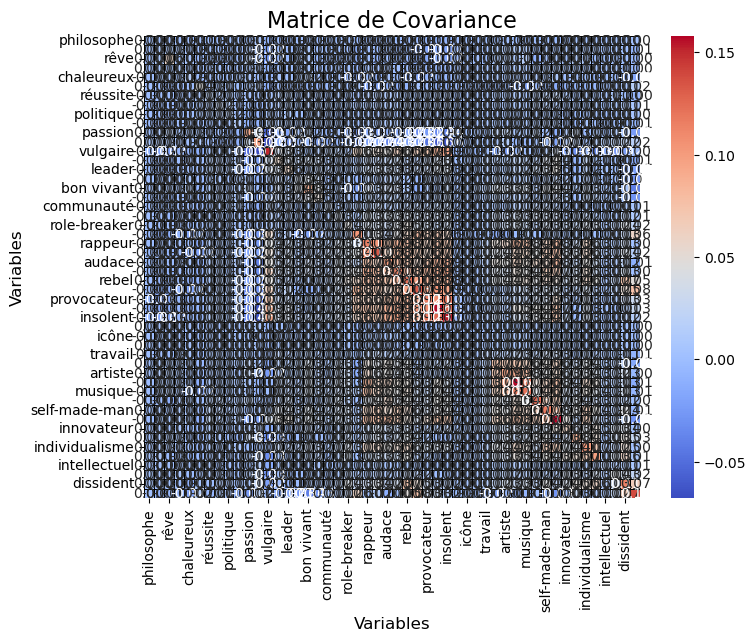

In [27]:
selected_data = df_100[labels]
covariance_matrix = selected_data.cov()
covariance_matrix
cov_matrix = covariance_matrix
inverse_df = covariance_matrix.map(lambda x: abs(1 /x ) if x != 0 else np.nan)
for i in range(min(inverse_df.shape[0], inverse_df.shape[1])):  # On parcourt les indices diagonaux
    inverse_df.iloc[i, i] = 0

# Convert the full distance matrix into a condensed vector
condensed_distance = squareform(inverse_df)

# Apply hierarchical clustering
linkage_matrix = linkage(condensed_distance, method='average')

# Get the optimal order of variables
optimal_order = leaves_list(linkage_matrix)

# Reorder the covariance matrix
reordered_cov_matrix = cov_matrix.iloc[optimal_order, optimal_order]

plt.figure(figsize=(8, 6))

# Dessiner la matrice avec Seaborn, en utilisant une palette de couleurs
sns.heatmap(reordered_cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Ajouter des labels
plt.title('Matrice de Covariance', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Afficher la matrice
plt.show()

Il y a beaucoup de cases complètement blanches. On va donc examiner la distribution de score pour chaque label afin d'éliminer des labels non pertinents

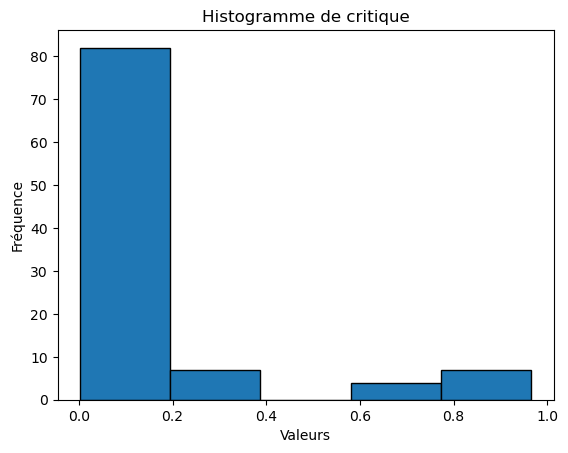

In [98]:
#On change le nom de colonne à chaque fois
plt.hist(df_100['rêve'], bins=5, edgecolor='black')

plt.title(f'Histogramme de critique')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

plt.show()

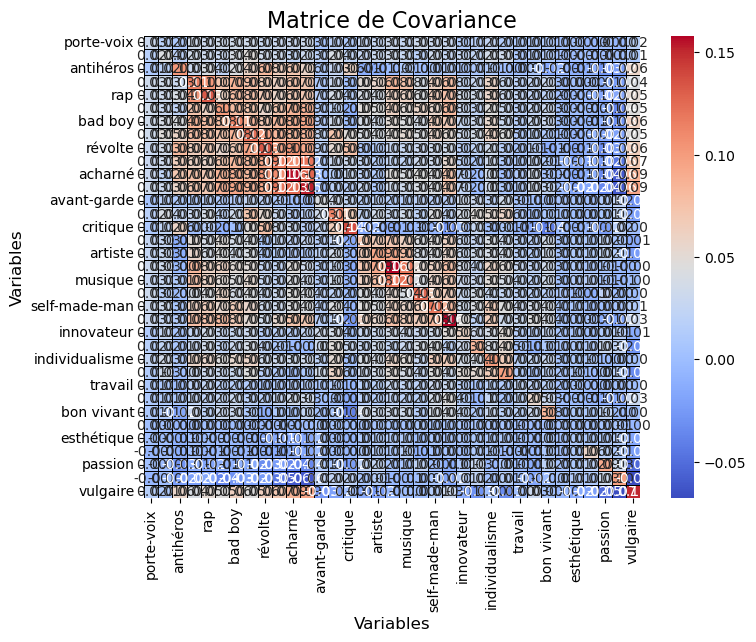

In [37]:
colonnes_a_supprimer = ['réussite','inspirant','militant','intellectuel', 'politique','philosophe','observateur','leader','communauté','rassembleur','chaleureux','festif','détendu','icône','populaire']
df_100 = df_100.drop(columns=colonnes_a_supprimer)
new_labels = [element for element in labels if element not in colonnes_a_supprimer]
selected_data = df_100[new_labels]
covariance_matrix = selected_data.cov()
covariance_matrix
cov_matrix = covariance_matrix
inverse_df = covariance_matrix.map(lambda x: abs(1 /x ) if x != 0 else np.nan)
for i in range(min(inverse_df.shape[0], inverse_df.shape[1])):  # On parcourt les indices diagonaux
    inverse_df.iloc[i, i] = 0

# Convert the full distance matrix into a condensed vector
condensed_distance = squareform(inverse_df)

# Apply hierarchical clustering
linkage_matrix = linkage(condensed_distance, method='average')

# Get the optimal order of variables
optimal_order = leaves_list(linkage_matrix)

# Reorder the covariance matrix
reordered_cov_matrix = cov_matrix.iloc[optimal_order, optimal_order]

plt.figure(figsize=(8, 6))

# Dessiner la matrice avec Seaborn, en utilisant une palette de couleurs
sns.heatmap(reordered_cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Ajouter des labels
plt.title('Matrice de Covariance', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Afficher la matrice
plt.show()

In [108]:
len(new_labels)

35

On garde 35 labels

In [9]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(selected_data)
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [11]:
components = pca.components_  # These are the weights (loadings)

# Print the formulas for each principal component
print("Formulas for each principal component:")
for k, weights in enumerate(components):
    calculation = " + ".join([f"({w:.4f} * {var})" for w, var in zip(weights, new_labels)])
    print(f"PC{k+1} = {calculation}")

Formulas for each principal component:
PC1 = (-0.2100 * self-made-man) + (-0.0184 * mérite) + (-0.0875 * travail) + (-0.2584 * acharné) + (-0.2462 * ambitieux) + (-0.1852 * individualisme) + (-0.1167 * indépendant) + (-0.0939 * entreprenarial) + (-0.2371 * audace) + (-0.2596 * rebel) + (-0.2529 * bad boy) + (-0.1354 * role-breaker) + (-0.2260 * provocateur) + (-0.1215 * antihéros) + (-0.2192 * révolte) + (-0.1362 * dissident) + (-0.0483 * critique) + (-0.2571 * insolent) + (-0.1477 * artiste) + (-0.2172 * musician) + (0.0084 * esthétique) + (-0.0988 * original) + (-0.0541 * avant-garde) + (-0.1577 * créateur) + (-0.1078 * innovateur) + (-0.2507 * rappeur) + (-0.2441 * rap) + (-0.2030 * musique) + (-0.1277 * porte-voix) + (-0.1633 * engagé) + (0.0755 * penseur) + (-0.0832 * bon vivant) + (0.0368 * passion) + (-0.1343 * vulgaire) + (0.0114 * rêve)
PC2 = (0.1540 * self-made-man) + (0.0978 * mérite) + (0.0836 * travail) + (-0.2587 * acharné) + (0.1072 * ambitieux) + (0.1460 * individualism

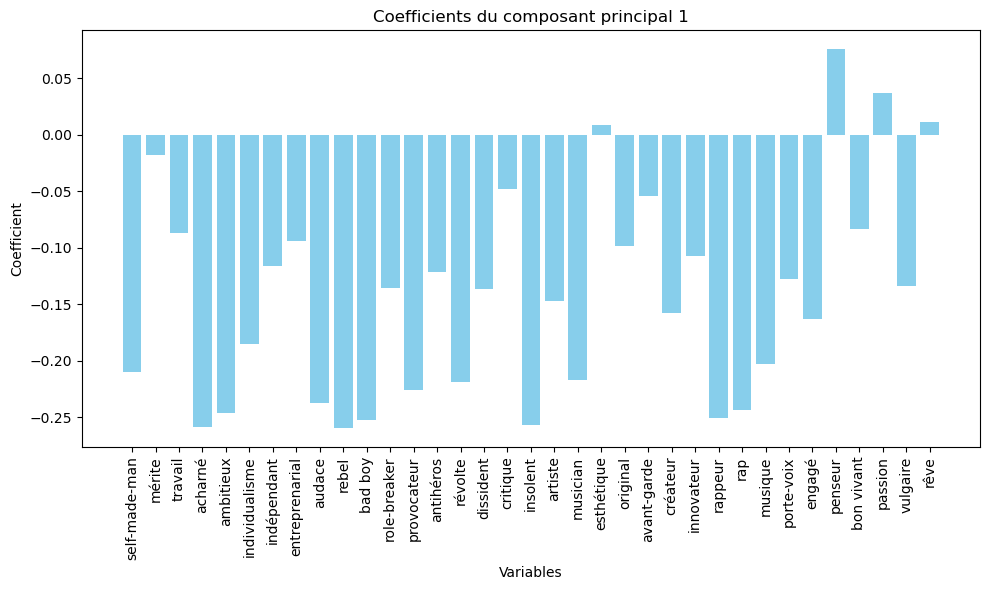

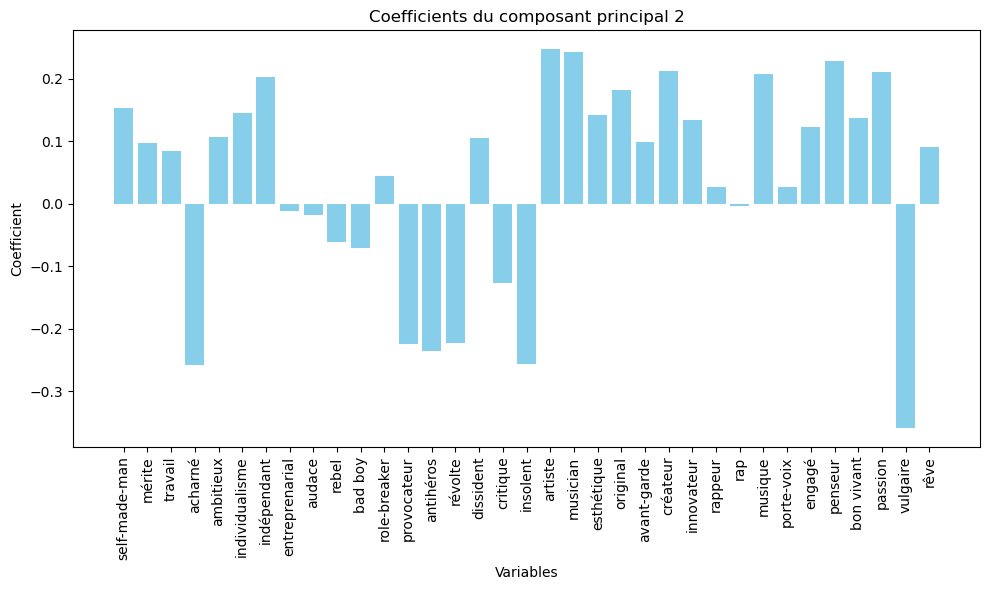

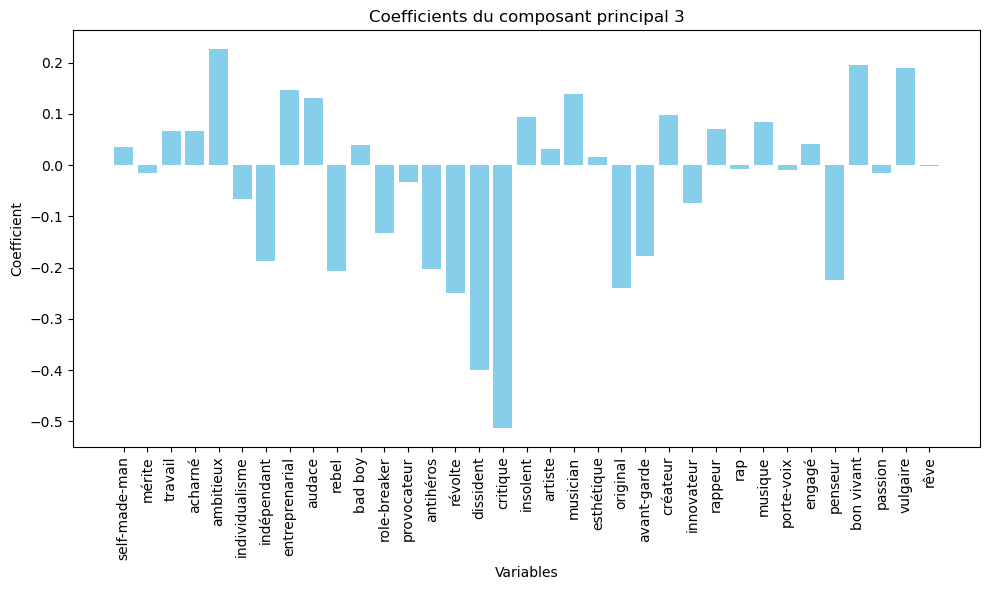

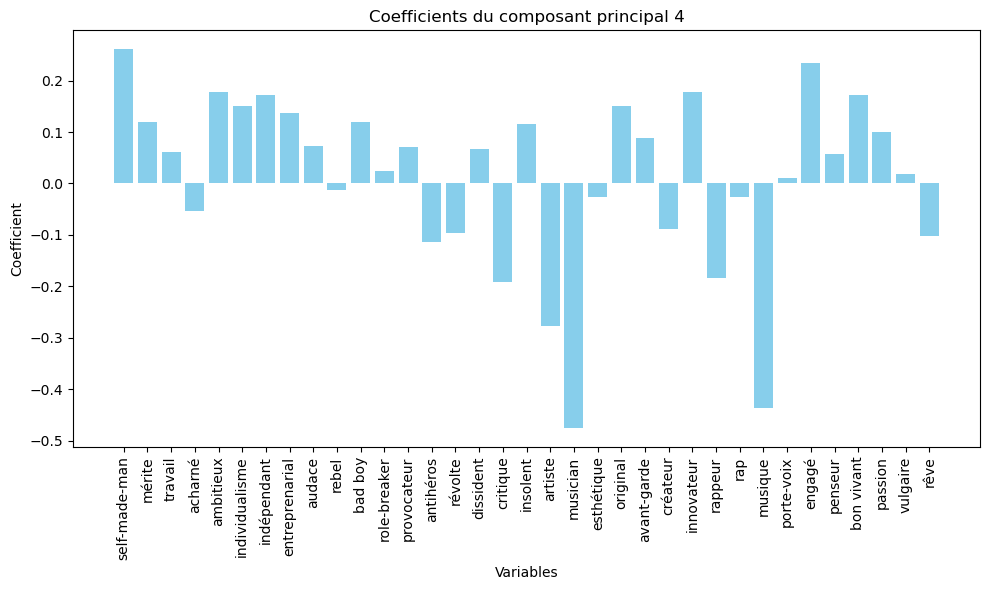

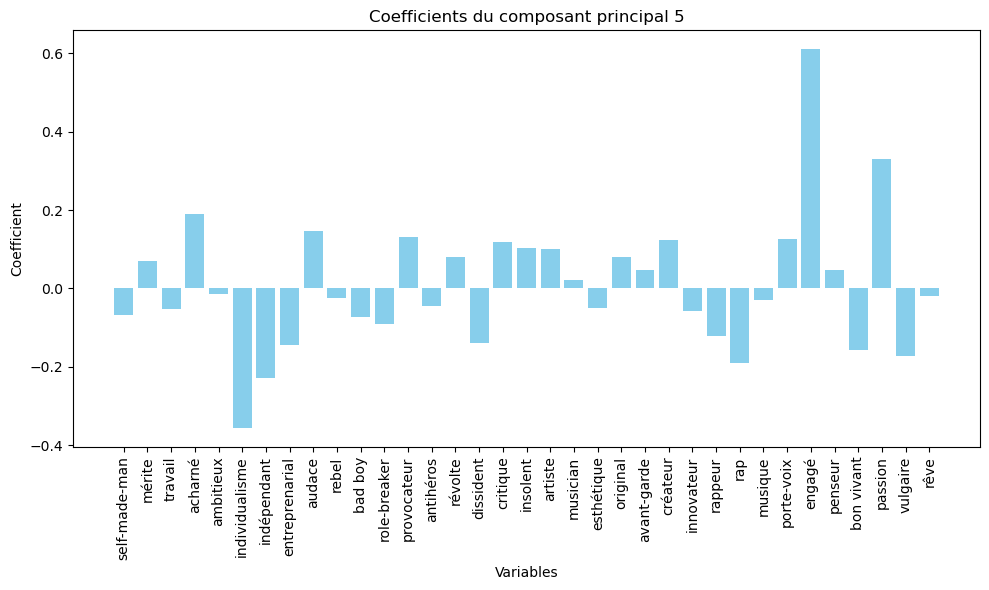

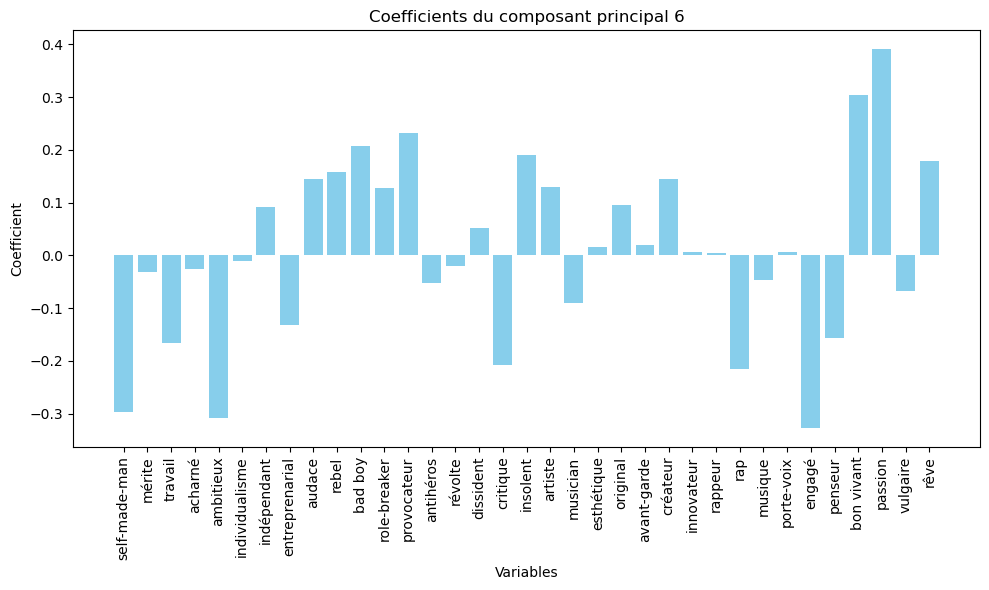

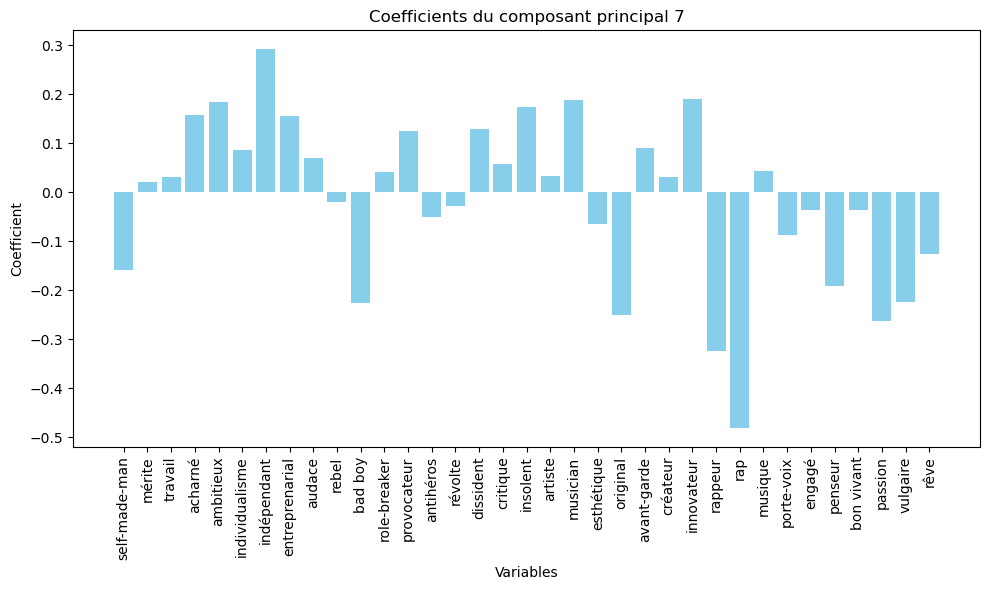

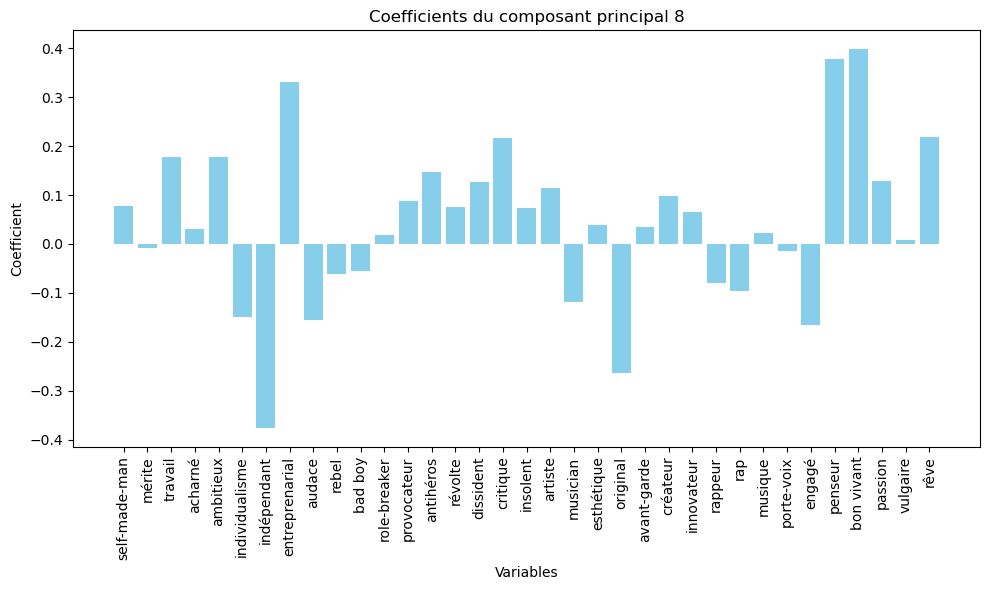

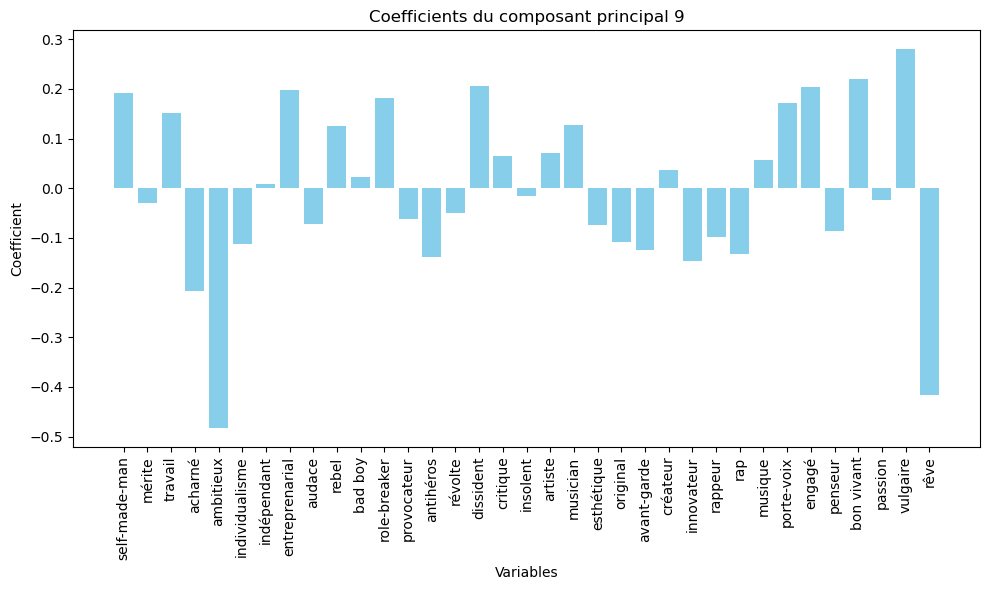

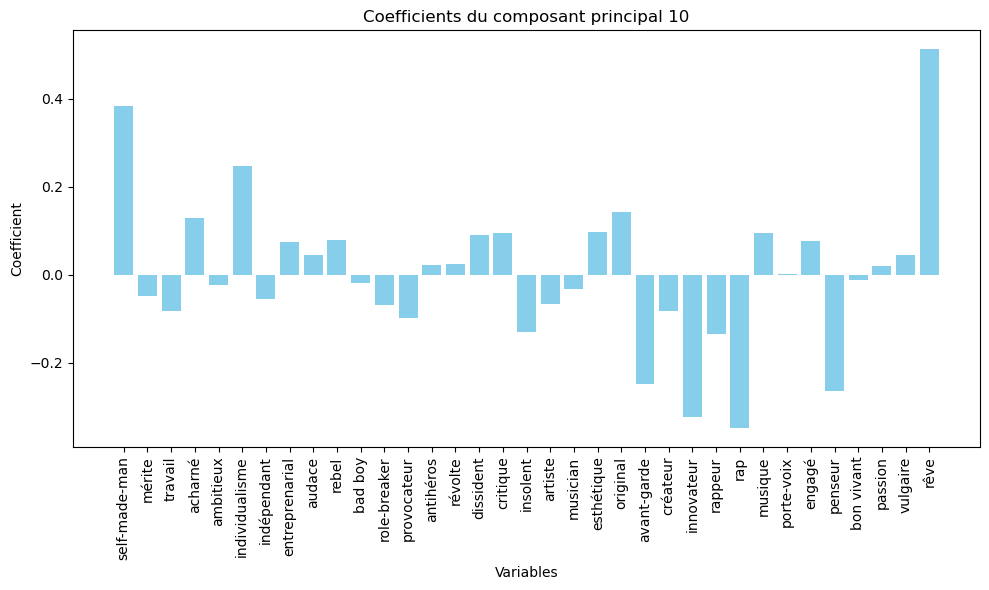

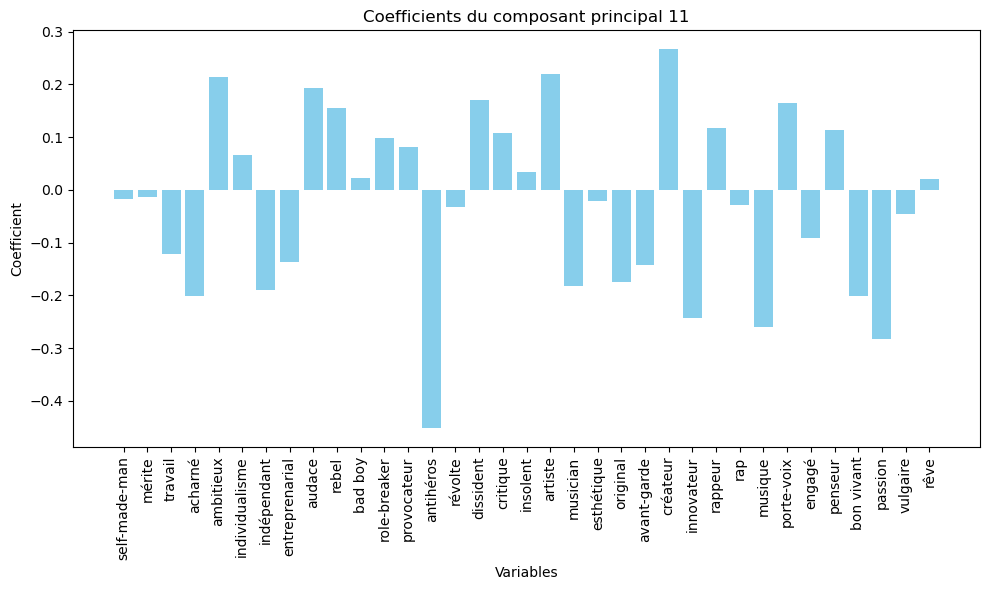

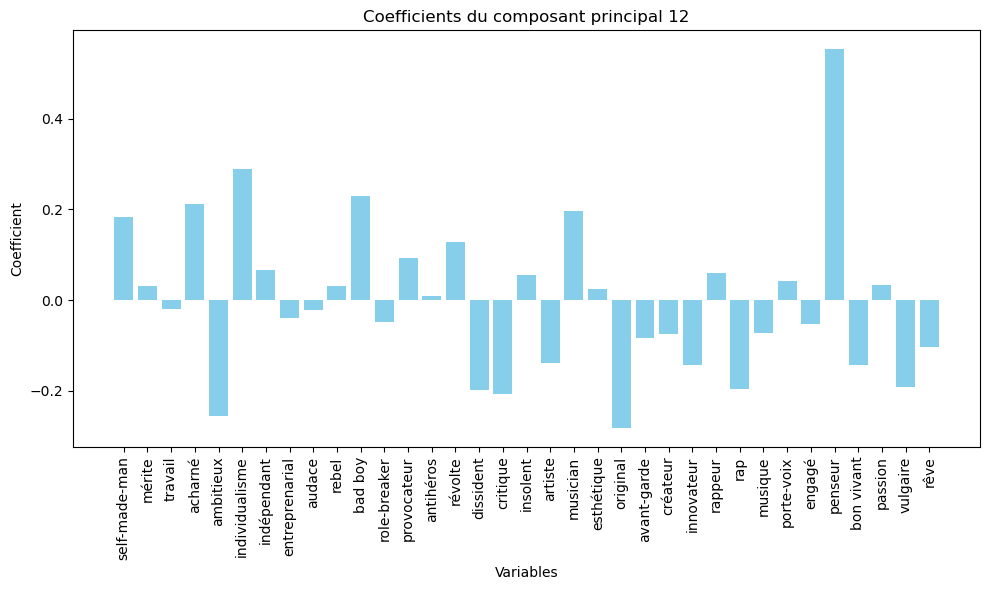

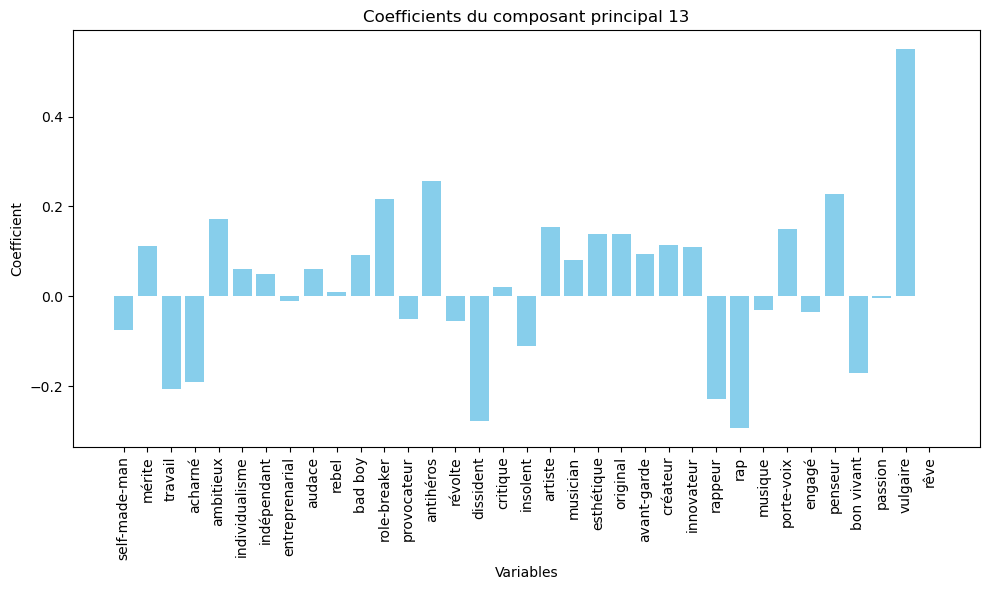

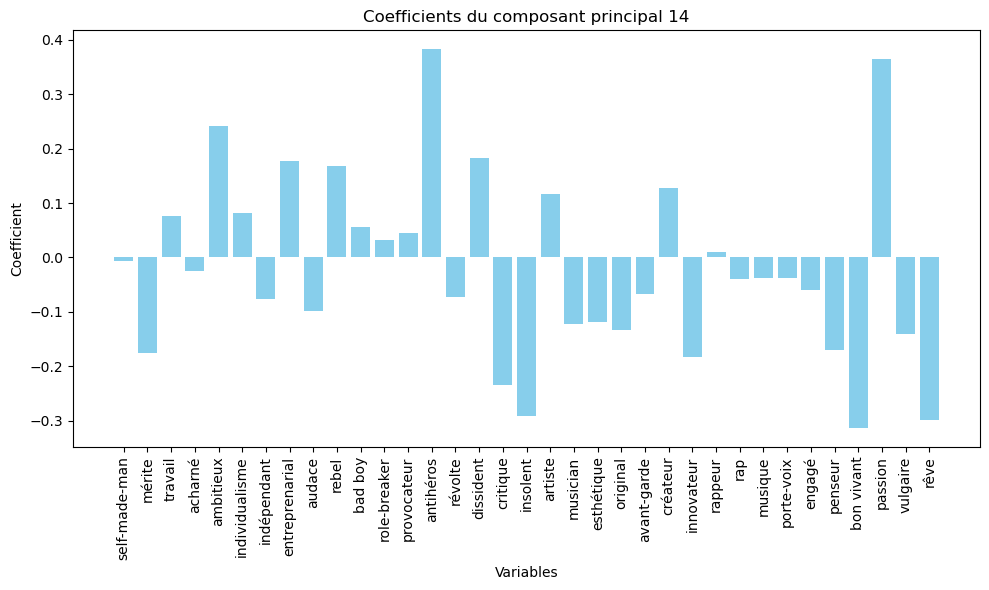

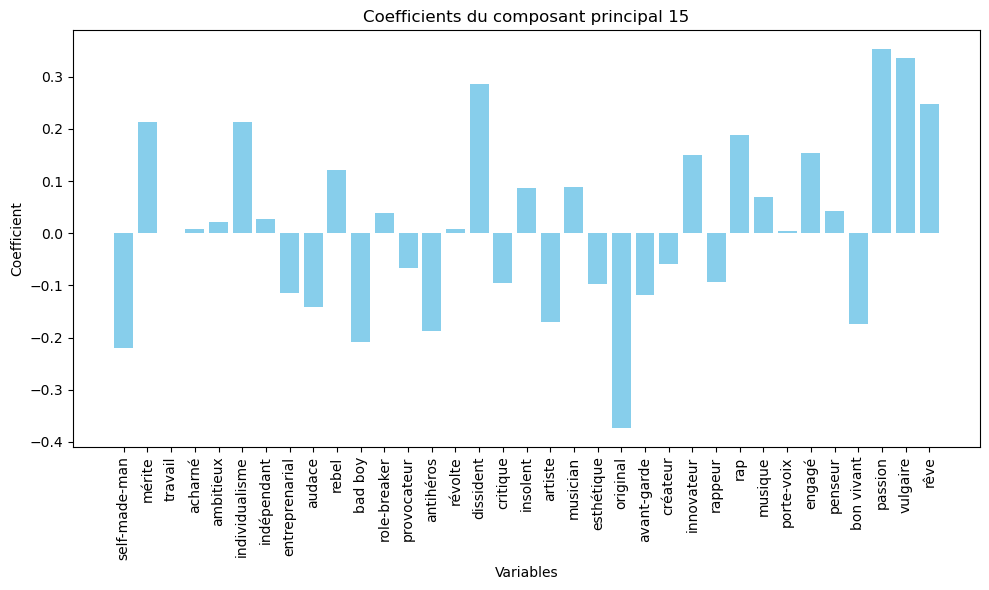

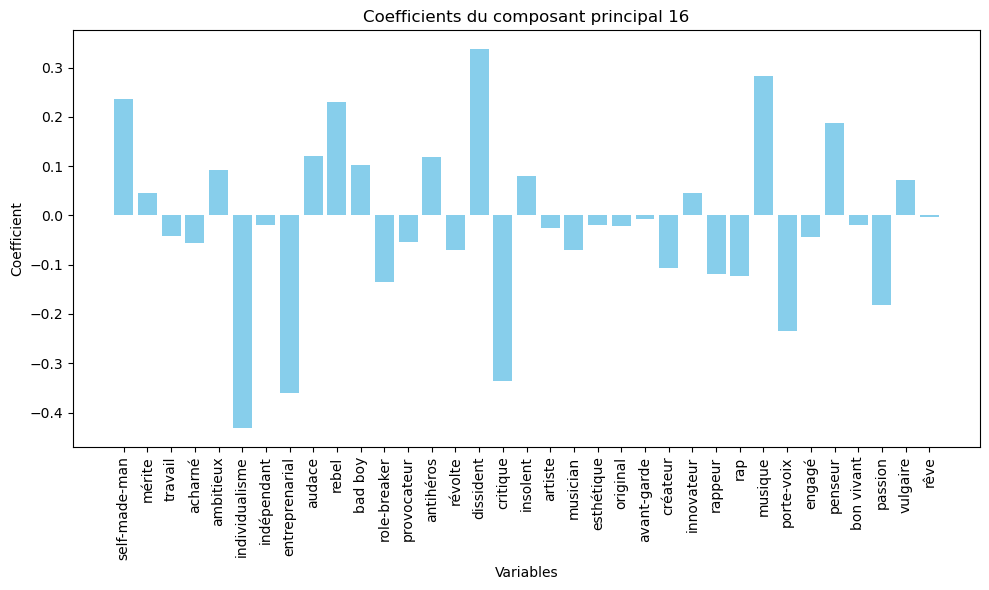

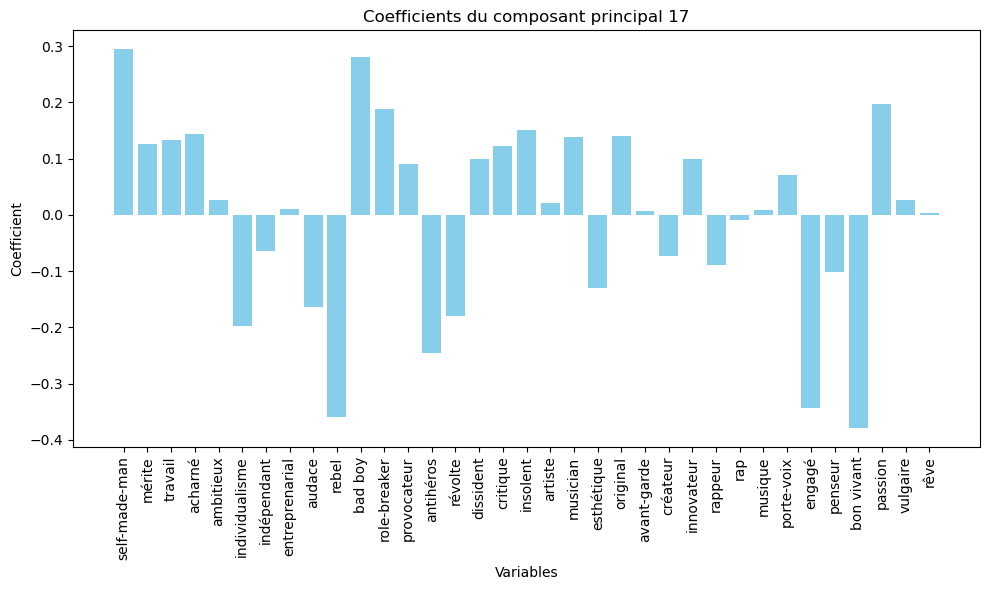

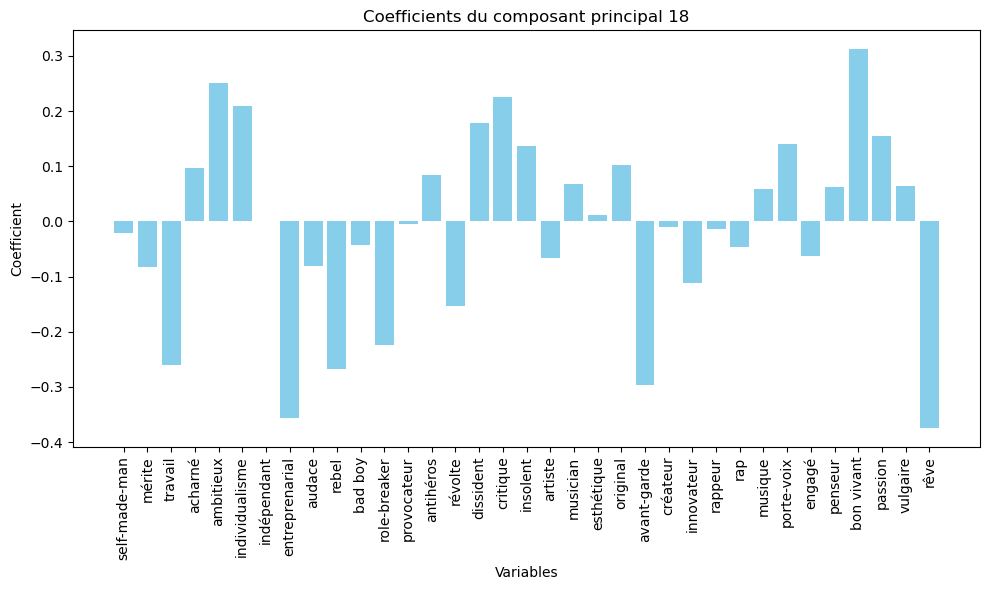

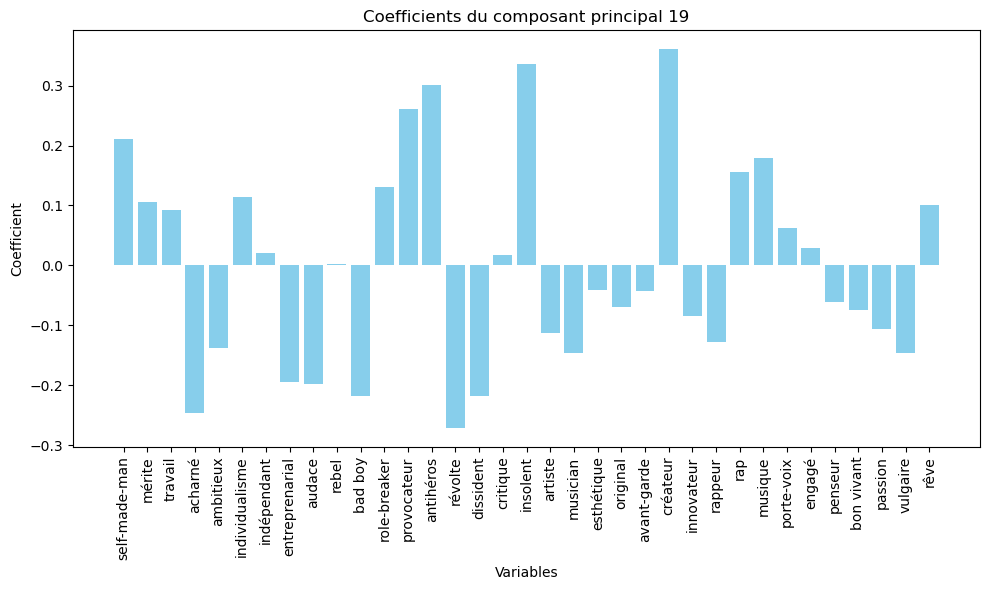

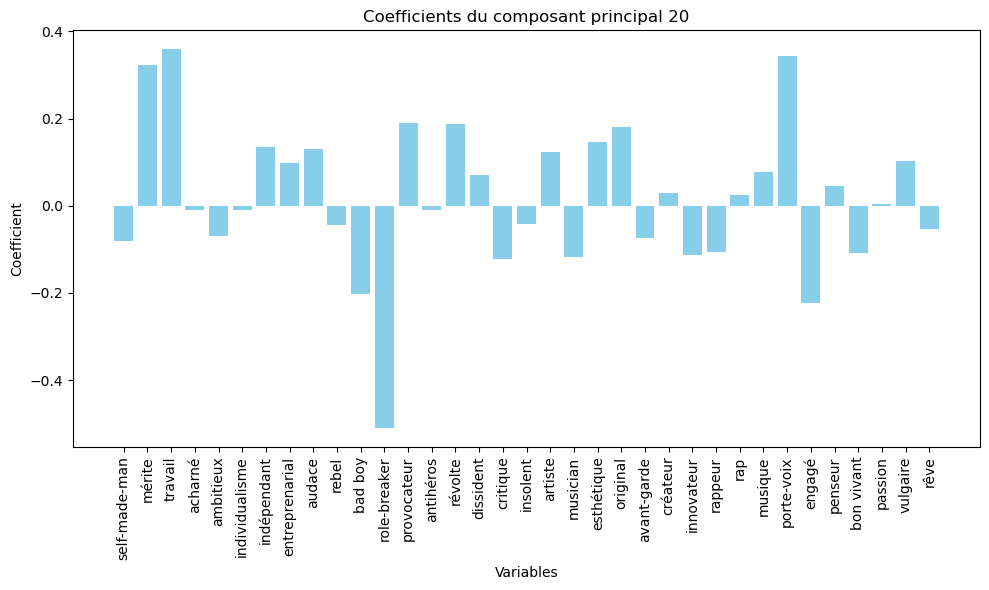

In [13]:
for i, component in enumerate(components):
    plt.figure(figsize=(10, 6))
    plt.bar(new_labels, component, color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f'Coefficients du composant principal {i+1}')
    plt.xlabel('Variables')
    plt.ylabel('Coefficient')
    plt.tight_layout()
    plt.show()

In [177]:
output_dir = "PCA_Coefficient_Plots"
os.makedirs(r"C:\\Users\\tian4\\PCA_Coefficient_Plots", exist_ok=True)

# Génération et exportation des graphiques
for i, component in enumerate(components):
    plt.figure(figsize=(10, 6))
    plt.bar(new_labels, component, color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f'Coefficients du composant principal {i+1}')
    plt.xlabel('Variables')
    plt.ylabel('Coefficient')
    plt.tight_layout()
    
    # Nom du fichier
    filename = os.path.join(output_dir, f'PCA_Component_{i+1}.png')
    plt.savefig(filename, dpi=300)  # Sauvegarder avec une haute résolution
    plt.close()  # Fermer la figure pour libérer de la mémoire

print(f"Les graphiques ont été exportés dans le dossier : {output_dir}")

Les graphiques ont été exportés dans le dossier : PCA_Coefficient_Plots


In [202]:
os.environ["OMP_NUM_THREADS"] = "1"

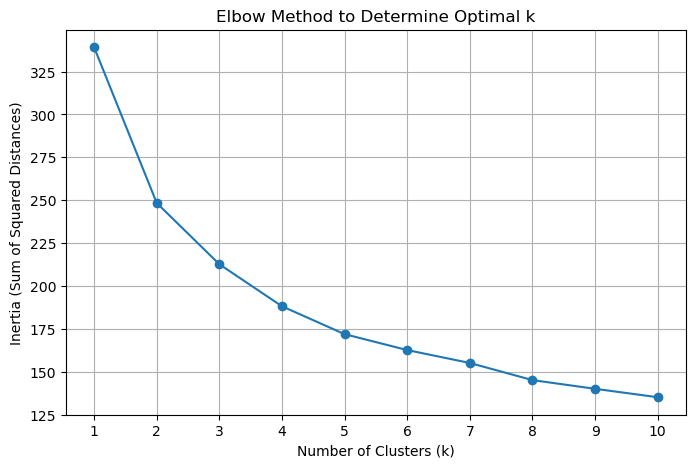

In [14]:

# Define a range of potential k values
k_range = range(1, 11)  # Change 11 to a larger number if needed

# List to store the sum of squared distances (inertia)
inertia = []

# Compute k-means for each k and store the inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [39]:
selected_data = df_100[new_labels].copy()

# Effectuer le clustering k-means avec k=4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced)

# Ajouter les labels de cluster au dataset
selected_data['Cluster'] = cluster_labels


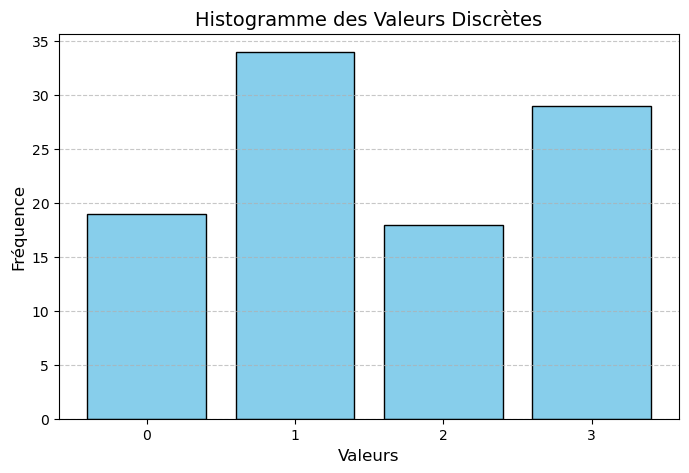

In [41]:
# Comptage des occurrences pour chaque valeur unique
value_counts = selected_data['Cluster'].value_counts().sort_index()

# Création de l'histogramme
plt.figure(figsize=(8, 5))
plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black', width=0.8)

plt.title("Histogramme des Valeurs Discrètes", fontsize=14)
plt.xlabel("Valeurs", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.xticks(value_counts.index)  # Pour s'assurer que les étiquettes des valeurs sont alignées correctement
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage
plt.show()

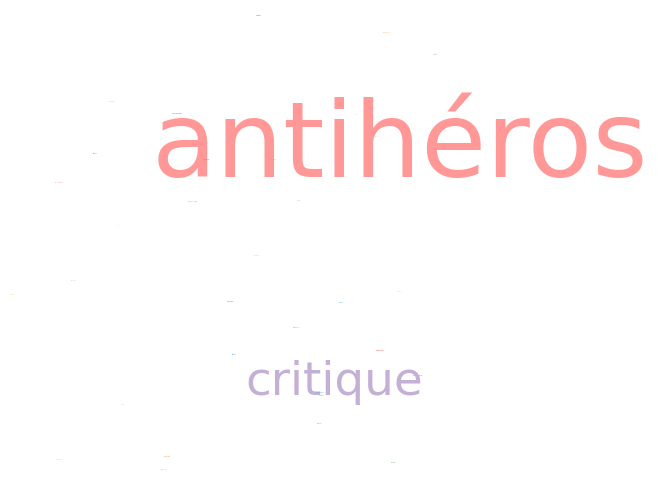

In [196]:
from math import exp
cluster_0_df = selected_data[selected_data['Cluster'] == 0]
df = cluster_0_df.copy()

# Vérification que le DataFrame n'est pas vide
if df.empty:
    raise ValueError("Le DataFrame sélectionné est vide. Vérifiez vos données.")

# Sélection de la première ligne (35 premières colonnes)
row = df.iloc[0, :35]

# Création du graphique
plt.figure(figsize=(3, 3))  # Ajustement pour une meilleure visibilité

colors = plt.cm.tab20(np.linspace(0, 1, len(row)))  # Palette "tab20"

# Ajout de chaque colonne avec une taille proportionnelle à sa valeur
max_value = max(row) if max(row) != 0 else 1  # Éviter une division par zéro

for (col_name, value), color in zip(row.items(), colors):
    plt.text(
        x=np.random.uniform(-1, 1),  # Position x aléatoire
        y=np.random.uniform(-1, 1),  # Position y aléatoire
        s=col_name,  # Texte du nom de la colonne
        fontsize= (1/50000)*exp(exp(exp(value / max_value))),  # Taille croissante à la vauer de l'étiquette
        color=color,  # Couleur unique
        ha='center',
        va='center'
    )

# Configuration du graphique
plt.axis('off')  # Masquer les axes
plt.show()